# Checking some vulnabilities of embeddings

In [12]:
import numpy as np
import librosa

import os
from pathlib import Path
import encoder.inference as encoder
import encoder.audio as audio
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt
import random
from sklearn.metrics.pairwise import cosine_similarity
import pyaudio
import time

In [14]:
voxDataPath = Path('data/LibriSpeech/dev-clean')
readmePath = Path('data/LibriSpeech/SPEAKERS.TXT')
random.seed(1)

In [15]:
modelPath = Path('pretrained.pt')
encoder.load_model(modelPath)

Loaded encoder "pretrained.pt" trained to step 1564501


In [8]:
# yeah... i think it will be made on better way
speakersIdDict = {}

for personNumber, personId in enumerate(os.listdir(voxDataPath)):
	if personNumber >= 30:
		break
	speakersIdDict[personId] = {}
	for personUtterace in os.listdir(voxDataPath/personId):
		speakersIdDict[personId][personUtterace] = {}
		for utteraceFragmentFilename in os.listdir(voxDataPath/personId/personUtterace):
			if not utteraceFragmentFilename.endswith('.flac'):
				continue
			_wav, _sr = librosa.load(voxDataPath/personId/personUtterace/utteraceFragmentFilename)
			speakersIdDict[personId][personUtterace][utteraceFragmentFilename] = _wav
			print(voxDataPath/personId/personUtterace/utteraceFragmentFilename)

data/LibriSpeech/dev-clean/1673/143397/1673-143397-0007.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0000.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0019.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0004.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0018.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0020.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0009.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0016.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0011.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0006.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0002.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0013.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0001.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0012.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0003.flac
data/LibriSpeech/dev-clean/1673/143397/1673-143397-0015.flac
data/LibriSpeech/dev-cle

In [9]:
personIds = list(speakersIdDict.keys())

In [33]:
# embedingi z jednej wypowiedzi
embsDict = {}


for personId in speakersIdDict:
	averageEmbs = []
	print("personId", personId)

	utteracesId = random.choice(list(speakersIdDict[personId].keys()))
	utteracesFragment = random.choice(list(speakersIdDict[personId][utteracesId].keys()))
	_wav = speakersIdDict[personId][utteracesId][utteracesFragment]
	emb = encoder.embed_utterance(_wav)
	embsDict[personId] = (utteracesId, utteracesFragment, emb)


personId 1673
personId 2412
personId 3081
personId 1993
personId 5694
personId 174
personId 2902
personId 1988
personId 422
personId 3000
personId 2803
personId 6319
personId 251
personId 6345
personId 7976
personId 2086
personId 3536
personId 84
personId 652
personId 2428
personId 3853
personId 2078
personId 3170
personId 8297
personId 5338
personId 777
personId 3576
personId 3752
personId 8842
personId 6295


In [34]:
embsDict

{'1673': ('143396',
  '1673-143396-0015.flac',
  array([7.68477470e-02, 0.00000000e+00, 8.08193609e-02, 0.00000000e+00,
         4.46815304e-02, 0.00000000e+00, 2.76209554e-03, 1.12434709e-02,
         0.00000000e+00, 2.36685555e-02, 3.83006260e-02, 6.56643361e-02,
         1.19532342e-03, 5.72920777e-02, 9.46089439e-03, 0.00000000e+00,
         3.16092186e-03, 0.00000000e+00, 0.00000000e+00, 3.04838438e-02,
         0.00000000e+00, 1.86951067e-02, 1.84063073e-02, 0.00000000e+00,
         0.00000000e+00, 2.41806302e-02, 9.47554782e-02, 7.30463415e-02,
         7.82842841e-03, 0.00000000e+00, 0.00000000e+00, 6.22508600e-02,
         0.00000000e+00, 9.23535302e-02, 6.68709800e-02, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 4.36413614e-03, 8.23057741e-02,
         0.00000000e+00, 0.00000000e+00, 1.27697572e-01, 2.72207707e-02,
         1.20057911e-02, 5.74656413e-04, 4.83790897e-02, 3.23714712e-03,
         6.89537264e-03, 1.32832932e-03, 0.00000000e+00, 2.52828784e-02,
    

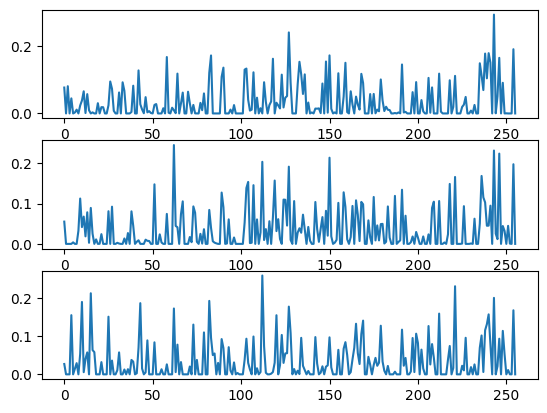

In [36]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(embsDict[personIds[0]][2])
plt.subplot(3,1,2)
plt.plot(embsDict[personIds[1]][2])
plt.subplot(3,1,3)
plt.plot(embsDict[personIds[2]][2])

In [53]:
np.linalg.norm(embsDict[personIds[0]][2].reshape(1, -1)-embsDict[personIds[0]][2].reshape(1, -1))

0.0

In [43]:
FORMAT = pyaudio.paFloat32
CHANNELS = 1
RATE = 16000
BUFFER_TIME = 1
BUFFER_SIZE = int(BUFFER_TIME*RATE)
# BUFFER_SIZE = 1024
buffer = None

p = pyaudio.PyAudio()
stream = p.open(
	format=FORMAT,
	channels=CHANNELS,
	rate=RATE,
	input=True,
	output=False,
	frames_per_buffer=BUFFER_SIZE,
)


data = stream.read(BUFFER_SIZE)
print(type(data))
dataNpy = np.frombuffer(data, dtype=np.float32)
encoder.embed_utterance(dataNpy, False, False)



print(type(dataNpy))

stream.stop_stream()
stream.close()
p.terminate()

Audio(dataNpy, rate=RATE)


<class 'bytes'>
<class 'numpy.ndarray'>


In [14]:
a = b''
print(a)
a = a+b'\x00'*2
print(a)
a = a
# print(a)

b''
b'\x00\x00'


In [16]:
# new_data = data[]
# data[:10] = new_data
data = b'\x00\x01\x02\x03\x04\x05\x06\x07'
print(data)
dataNew = b'\x08\x09\x0a\x0b'
data[:4] = data[4:]
data[4:] = dataNew
print(data)

b'\x00\x01\x02\x03\x04\x05\x06\x07'


TypeError: 'bytes' object does not support item assignment

In [17]:
data = b'\x00\x01\x02\x03\x04\x05\x06\x07'
print(data)

dataNew = b'\x08\x09\x0a\x0b'
data = data[4:] + dataNew
print(data)

b'\x00\x01\x02\x03\x04\x05\x06\x07'
b'\x04\x05\x06\x07\x08\t\n\x0b'
